In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz10.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz60.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz70.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz0.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz20.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz80.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz40.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz30.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz90.csv
/kaggle/input/gearbox-fault-diagnosis/BrokenTooth/b30hz50.csv
/kaggle/input/gearbox-fault-diagnosis/Healthy/h30hz20.csv
/kaggle/input/gearbox-fault-diagnosis/Healthy/h30hz70.csv
/kaggle/input/gearbox-fault-diagnosis/Healthy/h30hz50.csv
/kaggle/input/gearbox-fault-diagnosis/Healthy/h30hz60.csv
/kaggle/input/gearbox-fault-diagnosis/Healthy/h30hz90.csv
/kaggle/input/gearbox-fault-diagnosis/Healthy/h30hz10.csv
/kaggle/input/gearbox-fault-diagn

# Load Dataset

In [ ]:
all_df = pd.read_csv('https://raw.githubusercontent.com/Soot3/testing/master/gearbox_data.csv')

In [ ]:
#all_df.info()

In [ ]:
all_df.corr()

,a1,a2,a3,a4,load,failure
a1,1.000000,0.496620,0.744783,0.645139,0.349378,-0.587994
a2,0.496620,1.000000,0.710971,0.608025,0.269184,0.023764
a3,0.744783,0.710971,1.000000,0.846365,0.461763,-0.137630
a4,0.645139,0.608025,0.846365,1.000000,0.559458,-0.054651
load,0.349378,0.269184,0.461763,0.559458,1.000000,-0.005781
failure,-0.587994,0.023764,-0.137630,-0.054651,-0.005781,1.000000


<AxesSubplot:>

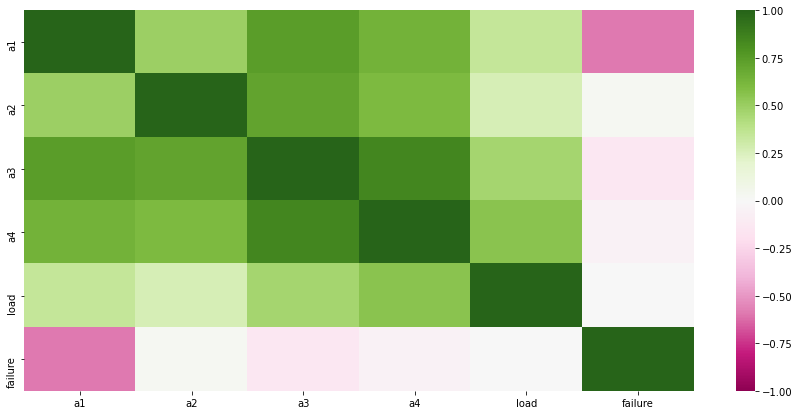

In [ ]:
#heatmap of correlations from -1 to 1
plt.subplots(figsize=(15,7))
sns.heatmap(all_df.corr(), vmin= -1, vmax = 1, cmap="PiYG")

<AxesSubplot:>

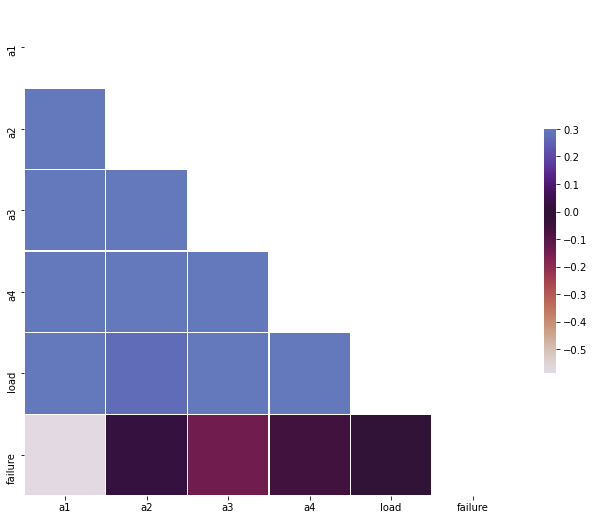

In [ ]:
# Compute the correlation matrix
corr = all_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='twilight_r', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

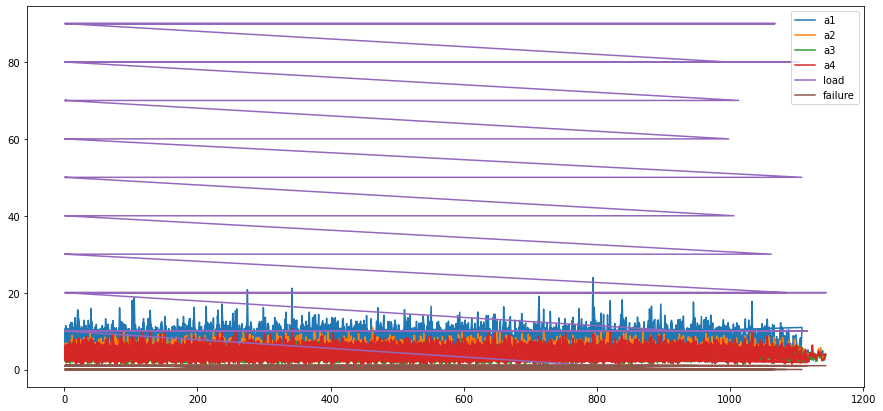

In [ ]:
all_df.plot(figsize=(15,7),legend=True)

<AxesSubplot:>

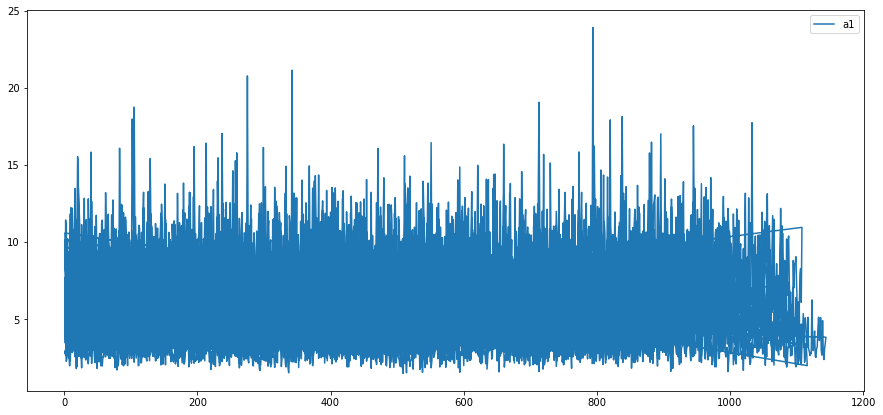

In [ ]:
all_df['a1'].plot(figsize=(15,7),legend=True)

<AxesSubplot:>

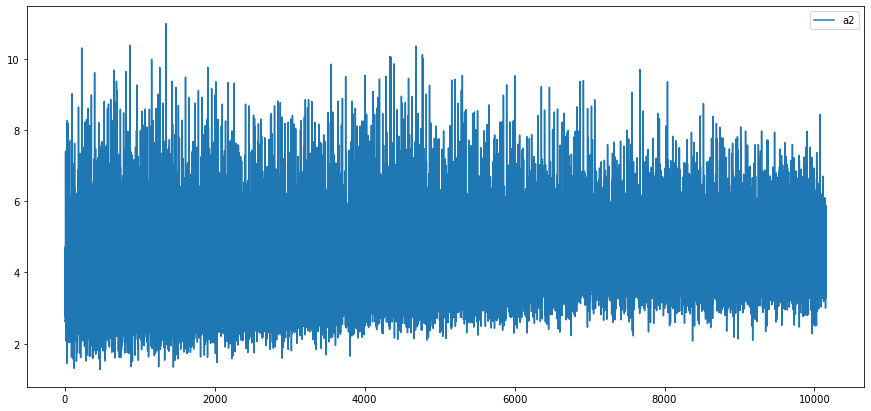

In [ ]:
all_df['a2'].plot(figsize=(15,7),legend=True)

<AxesSubplot:>

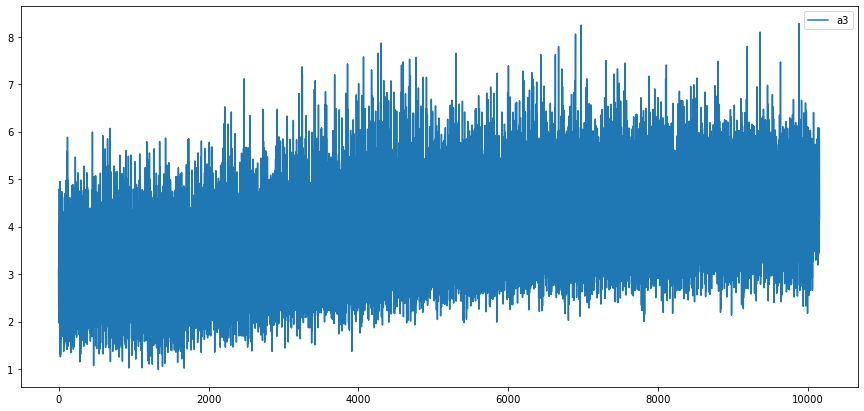

In [ ]:
all_df['a3'].plot(figsize=(15,7),legend=True)

<AxesSubplot:>

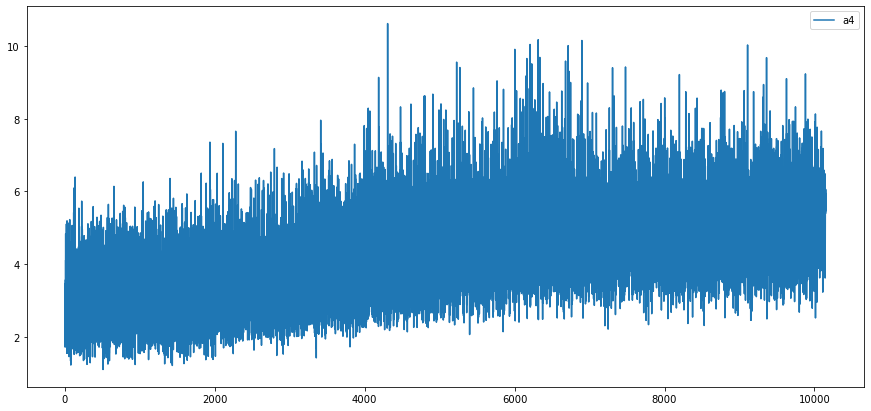

In [ ]:
all_df['a4'].plot(figsize=(15,7),legend=True)

<AxesSubplot:>

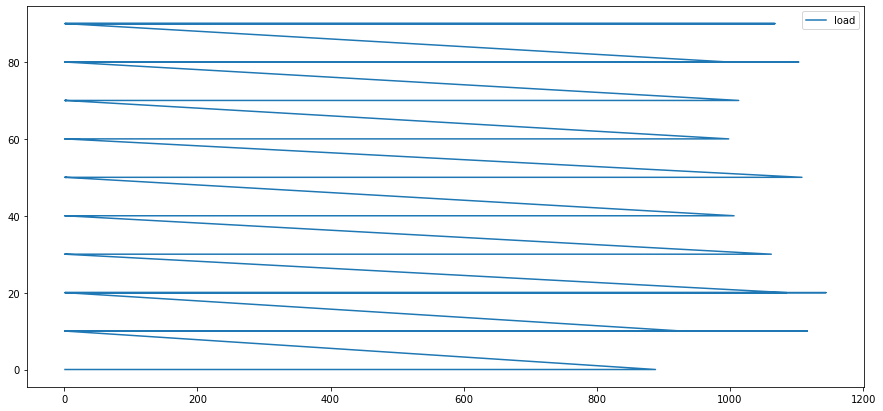

In [ ]:
all_df['load'].plot(figsize=(15,7),legend=True)

<AxesSubplot:>

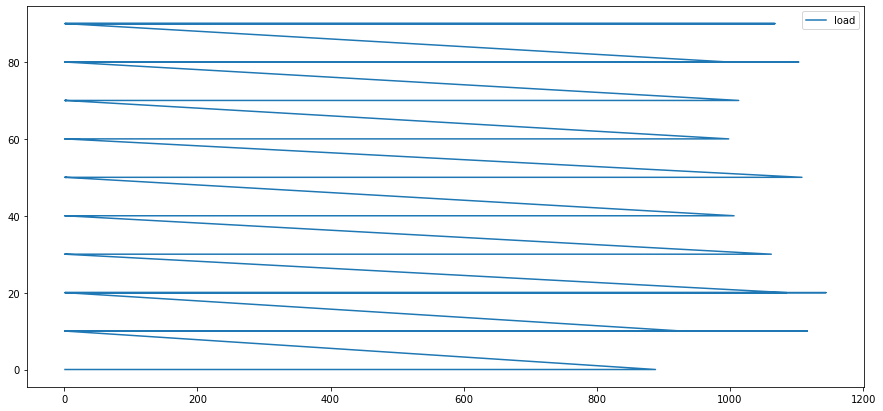

In [ ]:
all_df['load'].plot(figsize=(15,7),legend=True)

<AxesSubplot:>

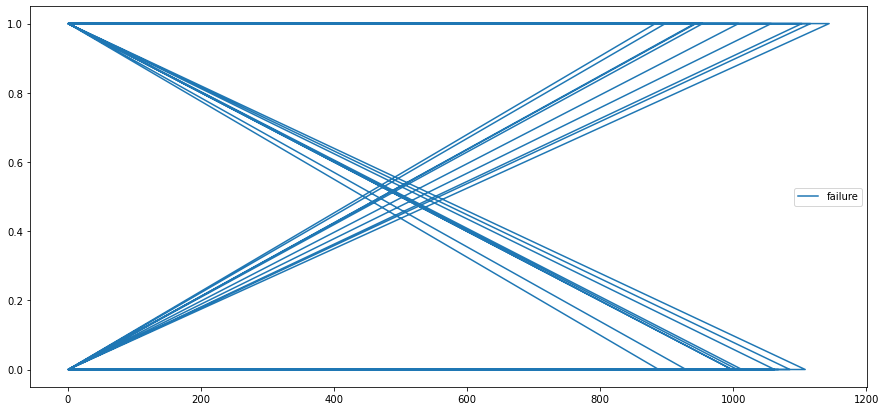

In [ ]:
all_df['failure'].plot(figsize=(15,7),legend=True)

<AxesSubplot:>

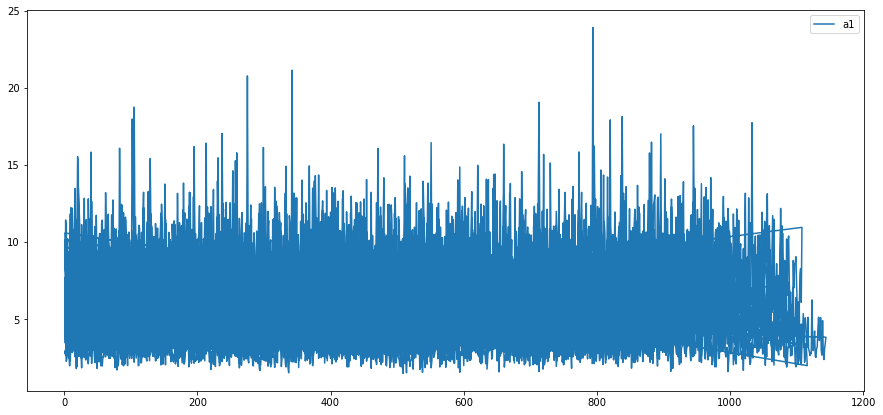

In [ ]:
all_df['a1'].plot(figsize=(15,7),legend=True)

In [ ]:
all_df['failure'].value_counts()

0    10154
1    10049
Name: failure, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Proportion of Machine States (Broken = 1, Healthy = 0)')

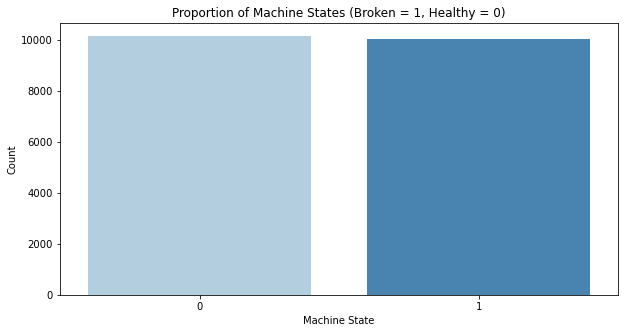

In [ ]:
f = all_df.loc[:,"failure"].value_counts().rename('Count')
plt.figure(figsize=(10, 5))
plt.xlabel("Machine State")
plt.ylabel('Count')

sns.barplot(f.index , f.values, palette = 'Blues').set_title('Proportion of Machine States (Broken = 1, Healthy = 0)')

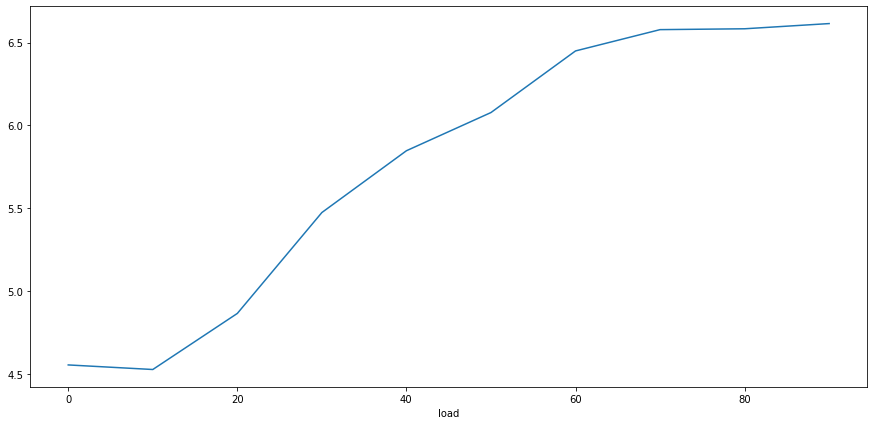

In [ ]:
grp=all_df.groupby('load')['a1'].mean()
fig, ax =plt.subplots(figsize=(15,7))
grp.plot(x='load',y='a1',ax=ax)
fig.show()

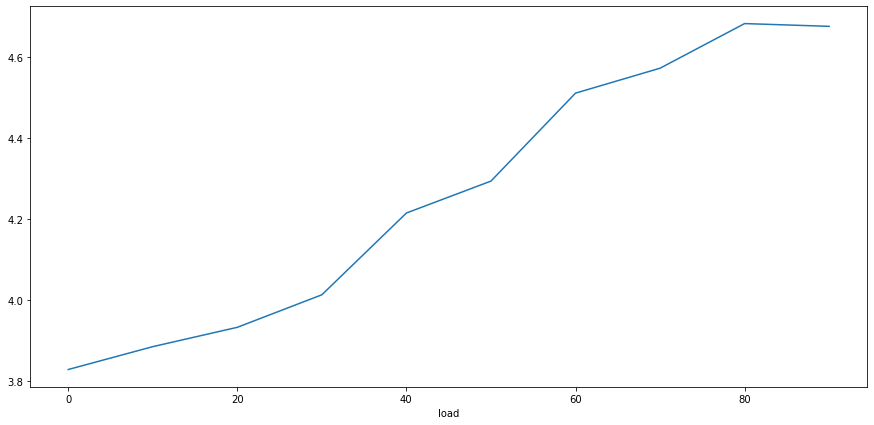

In [ ]:
grp=all_df.groupby('load')['a2'].mean()
fig, ax =plt.subplots(figsize=(15,7))
grp.plot(x='load',y='a2',ax=ax)
fig.show()

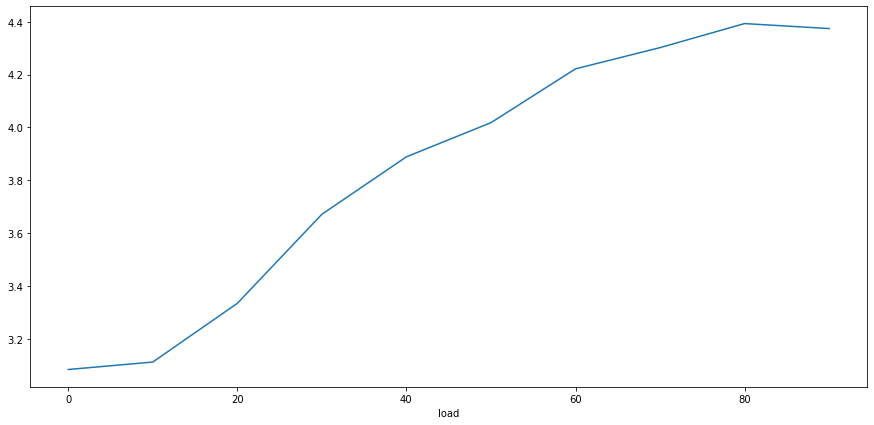

In [ ]:
grp=all_df.groupby('load')['a3'].mean()
fig, ax =plt.subplots(figsize=(15,7))
grp.plot(x='load',y='a3',ax=ax)
fig.show()

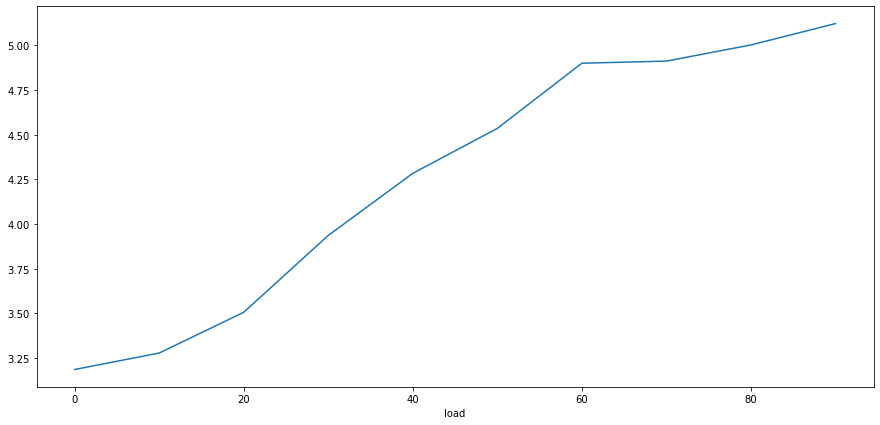

In [ ]:
grp=all_df.groupby('load')['a4'].mean()
fig, ax =plt.subplots(figsize=(15,7))
grp.plot(x='load',y='a4',ax=ax)
fig.show()

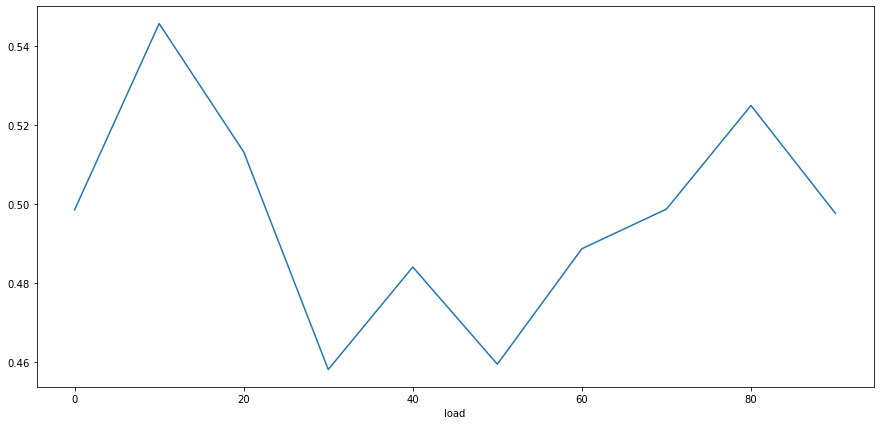

In [ ]:
grp=all_df.groupby('load')['failure'].mean()
fig, ax =plt.subplots(figsize=(15,7))
grp.plot(x='load',y='failure',ax=ax)
fig.show()

In [ ]:
all_df.shape

(20203, 6)

# **Split data into train and test sets**

<AxesSubplot:>

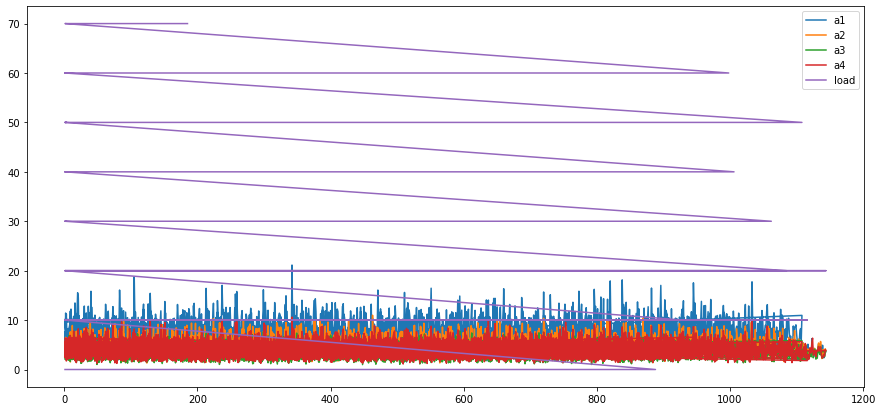

In [ ]:
X = all_df.drop(['failure'], axis=1)
y = all_df['failure']
train_percentage = 0.70
train_size = int(len(X.index)*train_percentage)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:20203]
y_test = y[train_size:20203]
X_train.plot(figsize=(15,7))

<AxesSubplot:>

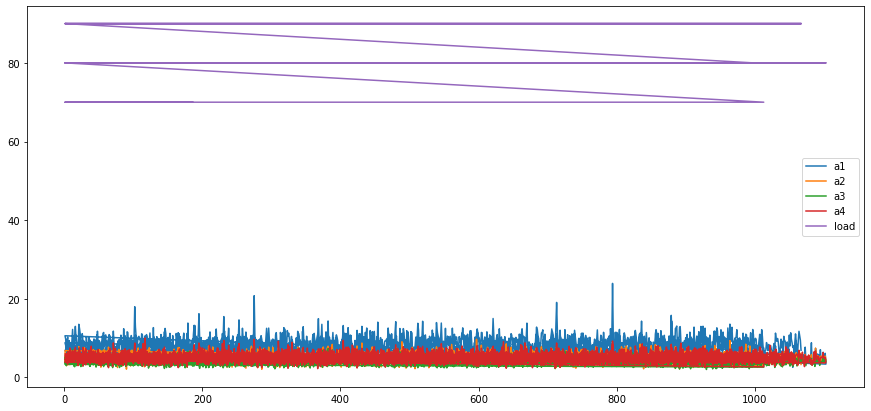

In [ ]:
X_test.plot(figsize=(15,7))

In [ ]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=X_train.columns, 
                              index=X_train.index)


X_test = pd.DataFrame(scaler.transform(X_test), 
                             columns=X_test.columns, 
                             index=X_test.index)


# **Modeling**

#### **Random Forest Classifier**

test accuracy:
0.917175383600066
train accuracy:
0.9043275350021214
              precision    recall  f1-score      support
0              0.883790  0.963613  0.921977  3078.000000
1              0.958595  0.869259  0.911744  2983.000000
accuracy       0.917175  0.917175  0.917175     0.917175
macro avg      0.921193  0.916436  0.916861  6061.000000
weighted avg   0.920606  0.917175  0.916941  6061.000000


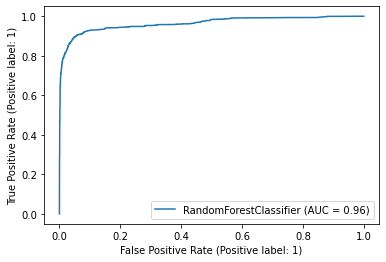

In [ ]:
rfcla = RandomForestClassifier(max_features='auto',
                       n_estimators=10, n_jobs=-1, random_state=42, criterion='entropy', max_depth=5, min_samples_leaf=10) 

rfcla.fit(X_train, y_train)

y_pred = rfcla.predict(X_test)

# Test score
score_rfcla = rfcla.score(X_test, y_test)
print('test accuracy:')
print(score_rfcla)
print('train accuracy:')
print(rfcla.score(X_train, y_train))

#Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
print(df_classification_report)

metrics.plot_roc_curve(rfcla, X_test, y_test)

#### **CatBoostClassifier**

test accuracy:
0.9104108232964857
train accuracy
0.9239145806816574
              precision    recall  f1-score      support
0              0.945832  0.873619  0.908293  3078.000000
1              0.879117  0.948374  0.912433  2983.000000
accuracy       0.910411  0.910411  0.910411     0.910411
macro avg      0.912475  0.910997  0.910363  6061.000000
weighted avg   0.912998  0.910411  0.910331  6061.000000


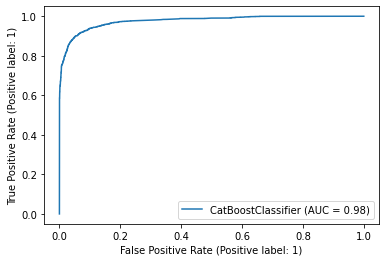

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(n_estimators = 50,random_state = 2020, learning_rate = 0.08, bagging_temperature=0.3, verbose = 0)

cat.fit(X_train,y_train)

y_pred = cat.predict(X_test)

score_cat = cat.score(X_test, y_test)
print('test accuracy:')
print(score_cat)
print('train accuracy')
print(cat.score(X_train, y_train))

#Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
print(df_classification_report)
metrics.plot_roc_curve(cat, X_test, y_test)

#### **XGBoost**

[20:25:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test accuracy:
0.7335423197492164
train accuracy
0.9865648423136756
              precision    recall  f1-score      support
0              0.995932  0.477258  0.645289  3078.000000
1              0.649150  0.997989  0.786630  2983.000000
accuracy       0.733542  0.733542  0.733542     0.733542
macro avg      0.822541  0.737623  0.715959  6061.000000
weighted avg   0.825259  0.733542  0.714852  6061.000000


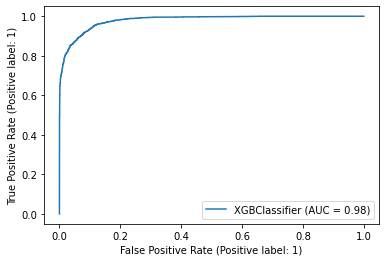

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", learning_rate = 0.08, random_state=42, n_estimators=600)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

xgb_score = xgb_model.score(X_test, y_test)
print('test accuracy:')
print(xgb_score)
print('train accuracy')
print(xgb_model.score(X_train, y_train))

#Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
print(df_classification_report)
metrics.plot_roc_curve(xgb_model, X_test, y_test)

#### **GradientBoostingClassifier**

test accuracy:
0.9133806302590332
train accuracy:
0.9227124876255126
              precision    recall  f1-score      support
0              0.883448  0.955491  0.918058  3078.000000
1              0.949854  0.869930  0.908136  2983.000000
accuracy       0.913381  0.913381  0.913381     0.913381
macro avg      0.916651  0.912710  0.913097  6061.000000
weighted avg   0.916131  0.913381  0.913175  6061.000000


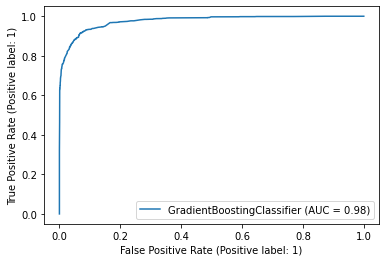

In [ ]:
gbcla = GradientBoostingClassifier(max_features='auto',
                       n_estimators=10, random_state=42, max_depth=5, min_samples_leaf=100, learning_rate = 0.08) 

gbcla.fit(X_train, y_train)

y_pred = gbcla.predict(X_test)

# Test score
score_gbcla = gbcla.score(X_test, y_test)
print('test accuracy:')
print(score_gbcla)
print('train accuracy:')
print(gbcla.score(X_train, y_train))

#Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
print(df_classification_report)
metrics.plot_roc_curve(gbcla, X_test, y_test)

#### **Logistic Regression**

test accuracy:
0.9095858769180003
train accuracy:
0.9144392589449866
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3078
           1       0.92      0.90      0.91      2983

    accuracy                           0.91      6061
   macro avg       0.91      0.91      0.91      6061
weighted avg       0.91      0.91      0.91      6061



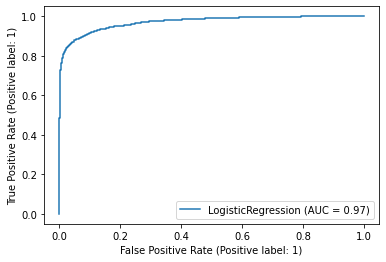

In [ ]:
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

prediction_lr = logistic.predict(X_test)

# Test score
score_logistic = logistic.score(X_test, y_test)
print('test accuracy:')
print(score_logistic)
print('train accuracy:')
print(logistic.score(X_train, y_train))

print(classification_report(y_test,prediction_lr))
metrics.plot_roc_curve(logistic, X_test, y_test)

#### **Plot Model Accuracies**

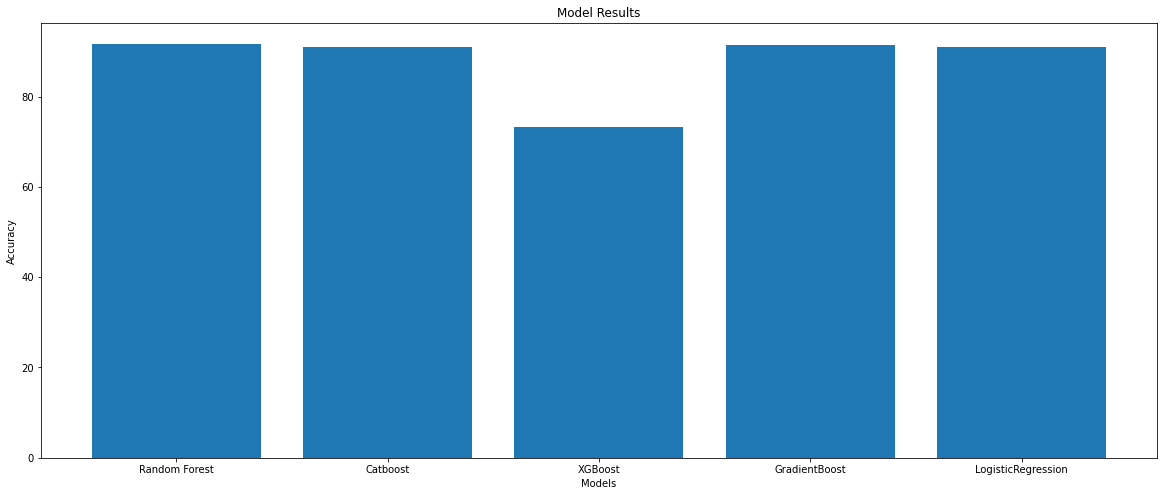

In [ ]:
results = [score_rfcla*100, score_cat*100, xgb_score*100, score_gbcla*100, score_logistic*100]
names = ['Random Forest', 'Catboost', 'XGBoost', 'GradientBoost', 'LogisticRegression']
plt.figure(figsize=(20, 8))
plt.bar(names,results)
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Model Results')
plt.show()

In [ ]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    names = X.columns
    feature_names = np.array(names)
    #feature_names = X_train.columns
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette = 'Blues')

    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

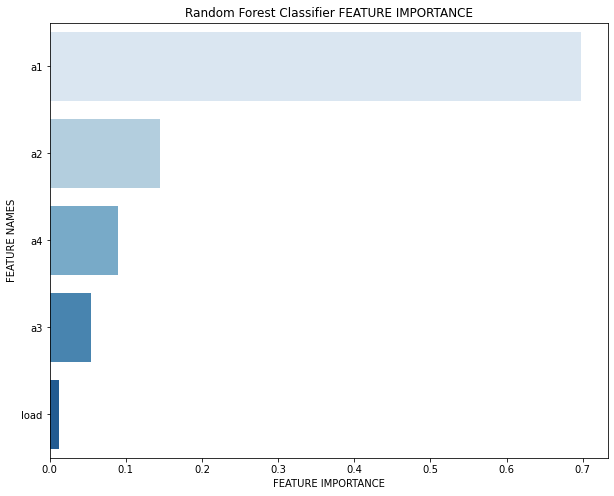

In [ ]:
plot_feature_importance(rfcla.feature_importances_,X.columns,'Random Forest Classifier')